In [182]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [183]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins = list(reader_ins)

In [184]:
#read in TikTok data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt = list(reader_tt)

In [185]:
#read in YouTube data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt = list(reader_yt)

In [186]:
# Making the Instagram dataframe
dfins = pd.DataFrame(rows_ins)
# Making the first row the header
new_header = dfins.iloc[0] 
dfins = dfins[1:]
dfins.columns = new_header 
#dfins

In [187]:
# Making the TikTok dataframe
dftt = pd.DataFrame(rows_tt)
# Making the first row the header
new_header = dftt.iloc[0] 
dftt = dftt[1:]
dftt.columns = new_header 
#dftt

In [188]:
# Making the YouTube dataframe
dfyt = pd.DataFrame(rows_yt)
# Making the first row the header
new_header = dfyt.iloc[0] 
dfyt = dfyt[1:]
dfyt.columns = new_header 
#dfyt

In [189]:
# Listing all the username for the Instagram Dataset
dfins['username'] = dfins['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf = set(dfins['username'].unique())

dftt['username'] = dftt['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf = set(dftt['username'].unique())

dfyt['channel_title'] = dfyt['channel_title'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf = set(dfyt['channel_title'].unique())

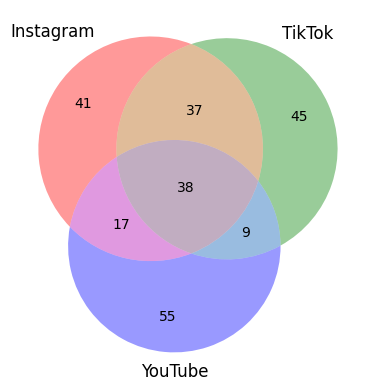

In [190]:
# Find common elements between lists
common_in_1_and_2 = insinf.intersection(ttinf)
common_in_1_and_3 = insinf.intersection(ytinf)
common_in_2_and_3 = ttinf.intersection(ytinf)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf:
        count += 1
    if name in ttinf:
        count += 1
    if name in ytinf:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf, ttinf, ytinf], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

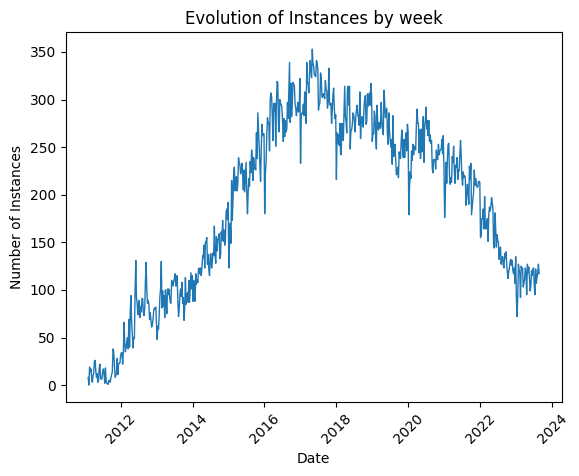

In [191]:
# Convert to datetime format
dfins['date'] = pd.to_datetime(dfins['date'])

# Group by the day and count instances for each week
count_by_week = dfins.resample('W-Mon', on='date').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['date'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

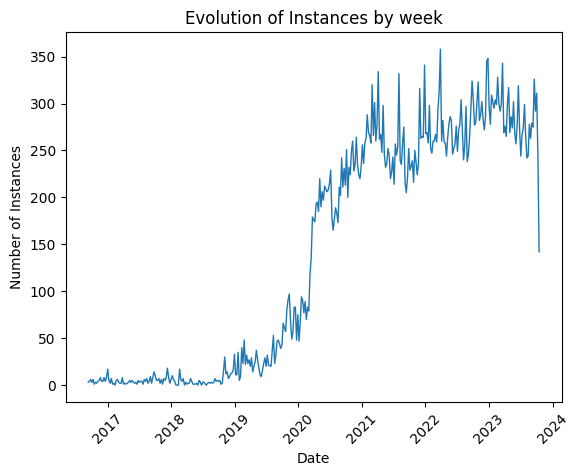

In [192]:
# Convert to datetime format
dftt['create_time'] = pd.to_datetime(dftt['create_time'])

# Group by the day and count instances for each week
count_by_week = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['create_time'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

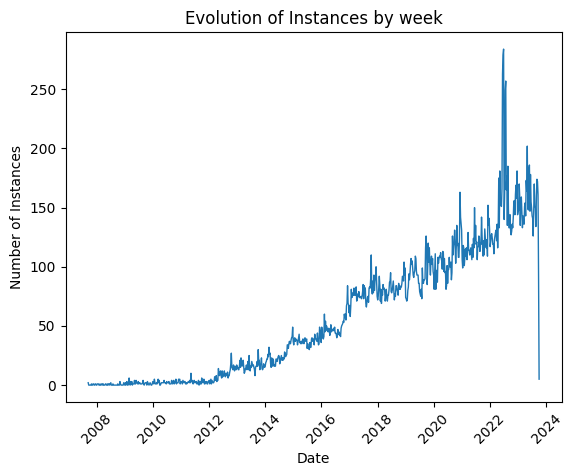

In [193]:
# Convert to datetime format
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'])

# Group by the day and count instances for each week
count_by_week = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['published_at_video'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

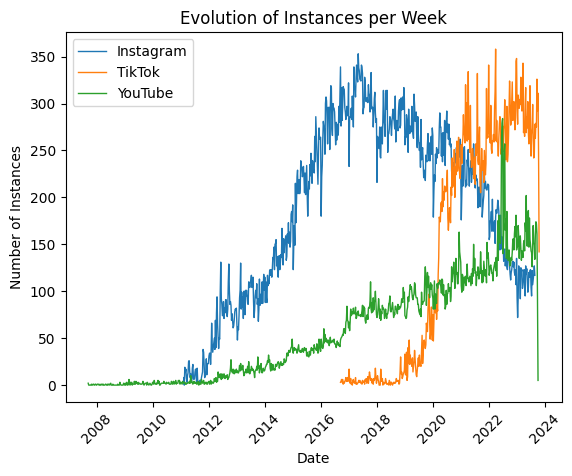

In [194]:
# Convert to datetime format for each DataFrame
dfins['date'] = pd.to_datetime(dfins['date'])
dftt['create_time'] = pd.to_datetime(dftt['create_time'])
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [195]:
insall = dfins[dfins['username'].isin(all_common_elements)]
ins12 = dfins[dfins['username'].isin(common_in_1_and_2)]
ins13 = dfins[dfins['username'].isin(common_in_1_and_3)]

ttall = dftt[dftt['username'].isin(all_common_elements)]
tt21 = dftt[dftt['username'].isin(common_in_1_and_2)]
tt23 = dftt[dftt['username'].isin(common_in_2_and_3)]

ytall = dfyt[dfyt['channel_title'].isin(all_common_elements)]
yt31 = dfyt[dfyt['channel_title'].isin(common_in_1_and_3)]
yt32 = dfyt[dfyt['channel_title'].isin(common_in_2_and_3)]
insall

,Unnamed: 0,username,caption,caption_hashtags,tagged_users,subscriber_count,ct_score,counts_disabled,likes,likes_expected,...,date,type,language,post_url,ct_id,country,size,followers_collection_time,dt_year_mon,language_detect
1,80541,NIKKIETUTORIALS,Loving my new H&M skull leggings <3,[],[],0,-338.9727626459144,False,1529,520483,...,2012-12-30 18:25:41,photo,en,https://www.instagram.com/p/T3uOkkFvBL/,419624|357958006871617611,,,,2012/12,Language.ENGLISH
2,80542,NIKKIETUTORIALS,My look for a birthday party I'm attending ton...,['LookOfTheDay'],[],0,-159.3099664736361,False,3204,520483,...,2012-12-30 17:59:44,photo,en,https://www.instagram.com/p/T3rQeOlvOO/,419624|357944943367877518,,,,2012/12,Language.ENGLISH
3,80543,NIKKIETUTORIALS,Eye of the Day: Graphic Eyeliner! #makeuptalk,['makeuptalk'],[],0,-204.0187353629977,False,2524,520483,...,2012-12-29 23:17:09,photo,en,https://www.instagram.com/p/T1qycYlvKm/,419624|357379929850442406,,,,2012/12,Language.ENGLISH
4,80544,NIKKIETUTORIALS,Sushi lunch date with my dearest @jcxmakeupart...,[],['jcxmakeupartist'],0,-342.7514754098361,False,1509,520483,...,2012-12-29 12:28:54,photo,en,https://www.instagram.com/p/T0gmiJFvCM/,419624|357053655957303436,,,,2012/12,Language.ENGLISH
5,80545,NIKKIETUTORIALS,My prop for a tutorial I'm filming tomorrow! #...,"['preview', 'sneakpeek']",[],0,-542.7788161993769,False,949,520483,...,2012-12-27 23:05:34,photo,en,https://www.instagram.com/p/Twf35MlvL6/,419624|355924550989837050,,,,2012/12,Language.ENGLISH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122978,13069,BEAUTYGLOSS,Broccoli met garnalen,[],[],0,-83.27948717948718,False,382,32240,...,2012-04-07 18:02:50,photo,nl,https://www.instagram.com/p/JILXlujt1e/,528261|164431385968172382,,,,2012/04,Language.DUTCH
122979,13070,BEAUTYGLOSS,Verse muntthee.. Lekker na een workout :),[],[],0,-69.54817987152035,False,459,32240,...,2012-04-07 10:46:40,photo,nl,https://www.instagram.com/p/JHZc_ujt2K/,528261|164211855157288330,,,,2012/04,Language.DUTCH
122980,13071,BEAUTYGLOSS,Salade gamba.. Mmm!,[],[],0,-65.88032454361054,False,479,32240,...,2012-04-07 10:26:48,photo,nl,https://www.instagram.com/p/JHXLeFDt1f/,528261|164201854703426911,,,,2012/04,Language.DUTCH
122981,13072,BEAUTYGLOSS,Love mijn Hot Diamonds peertje! Mijn nieuwe ev...,[],[],0,-35.96788482834994,False,873,32240,...,2012-04-07 08:05:45,photo,nl,https://www.instagram.com/p/JHHCdVjtzB/,528261|164130866687040705,,,,2012/04,Language.DUTCH


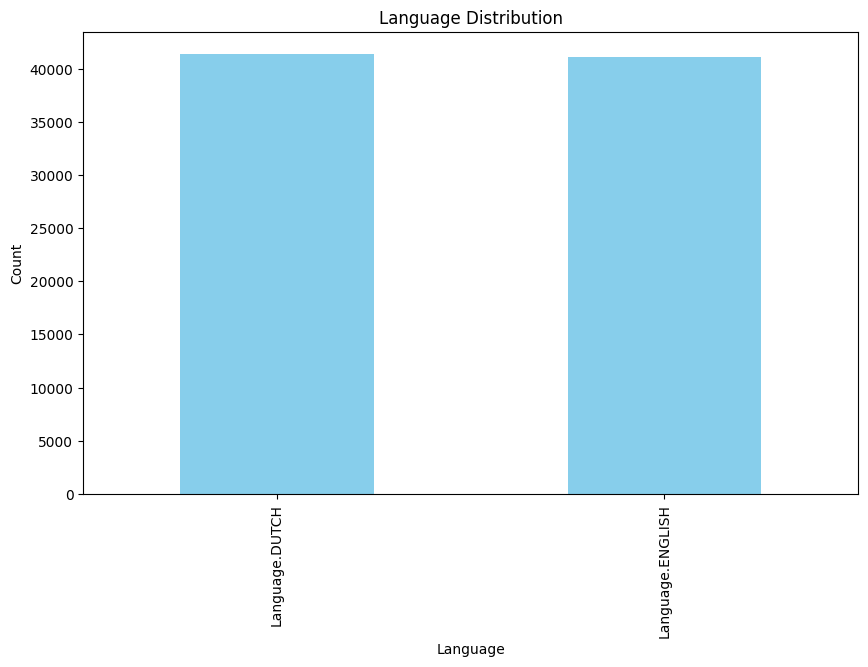

In [196]:
# Calculate the proportions of each language
insall = insall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = insall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

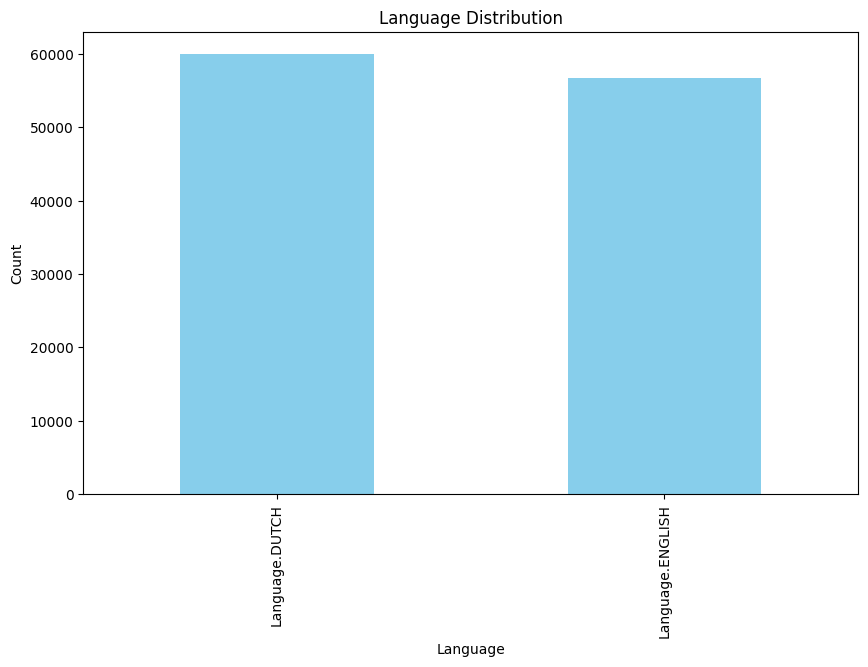

In [197]:
# Calculate the proportions of each language
dfins = dfins.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfins['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

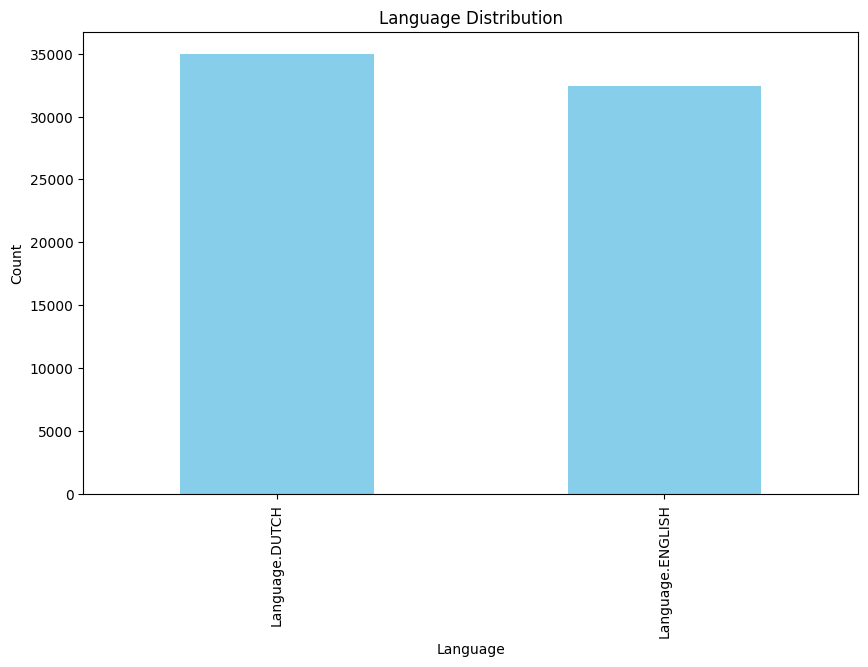

In [198]:
# Calculate the proportions of each language
ins12 = ins12.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins12['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

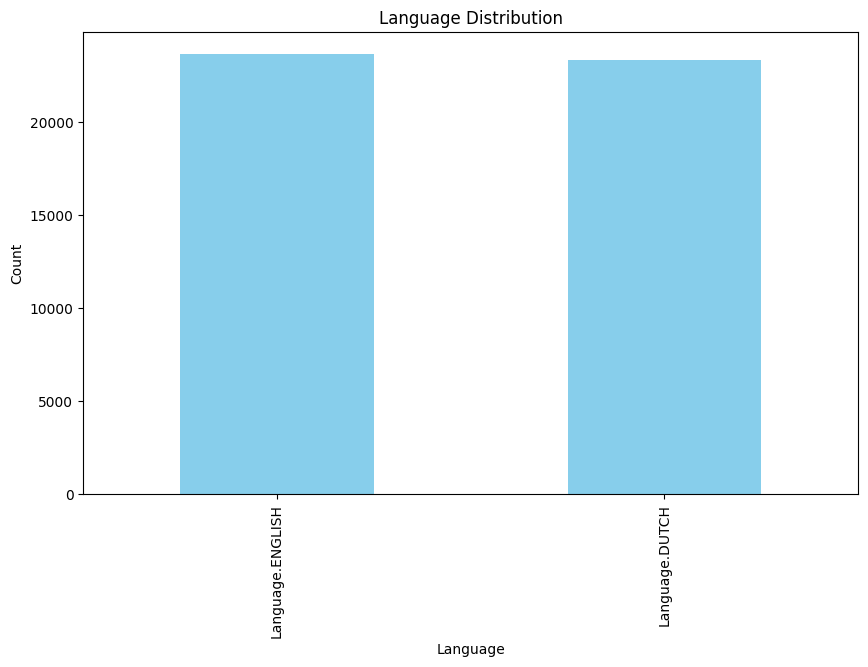

In [199]:
# Calculate the proportions of each language
ins13 = ins13.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins13['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

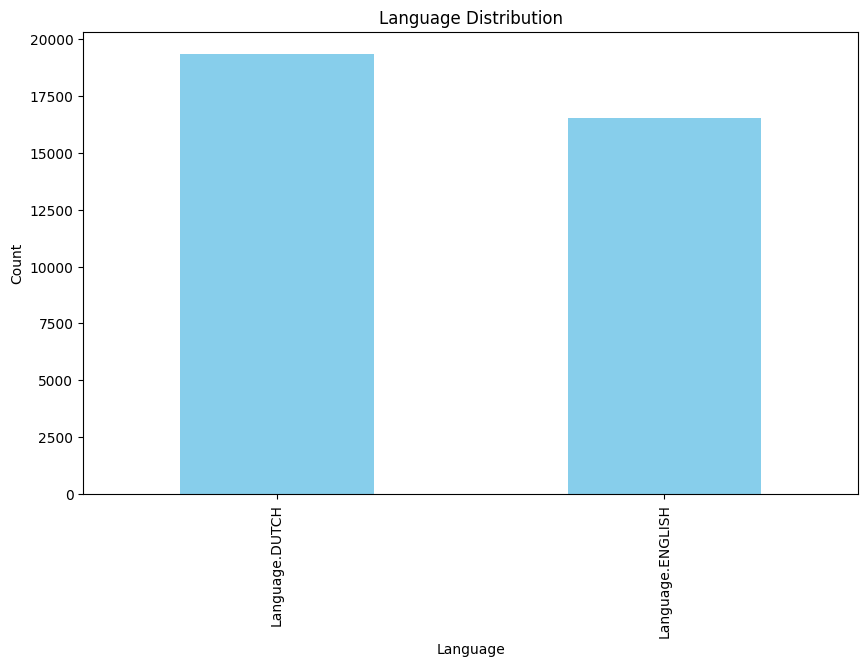

In [200]:
# Calculate the proportions of each language
ttall = ttall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ttall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

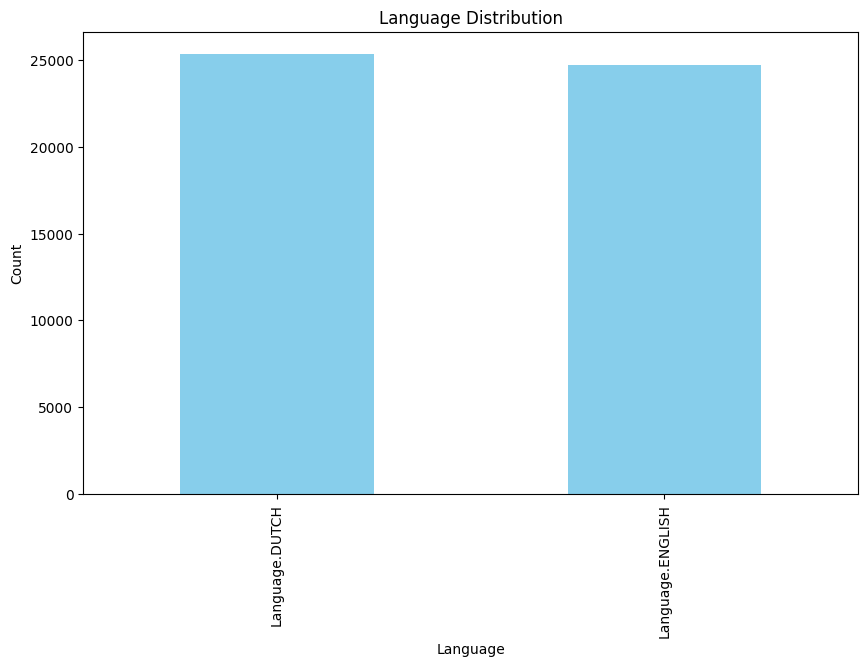

In [201]:
# Calculate the proportions of each language
dftt = dftt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dftt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

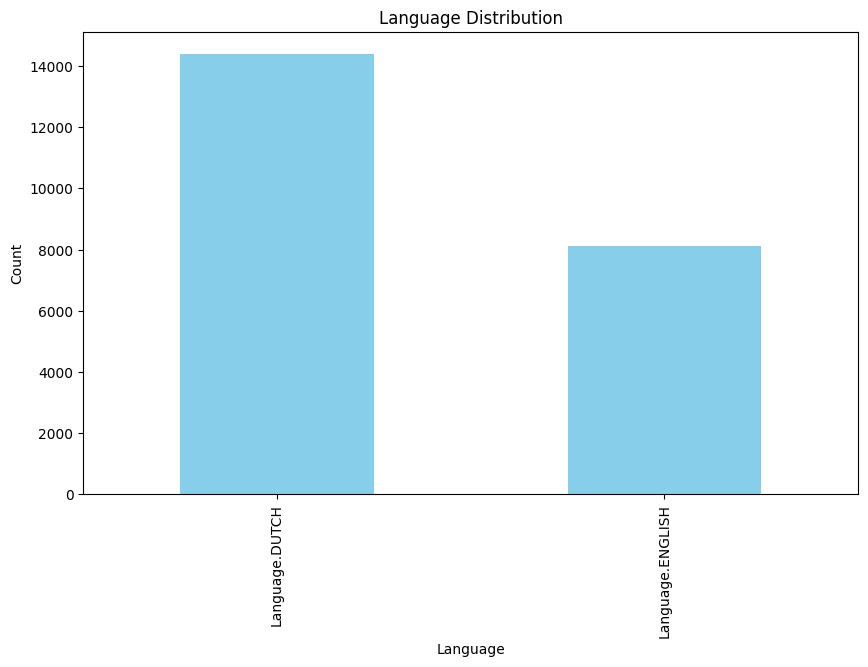

In [202]:
# Calculate the proportions of each language
tt23 = tt23.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt23['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

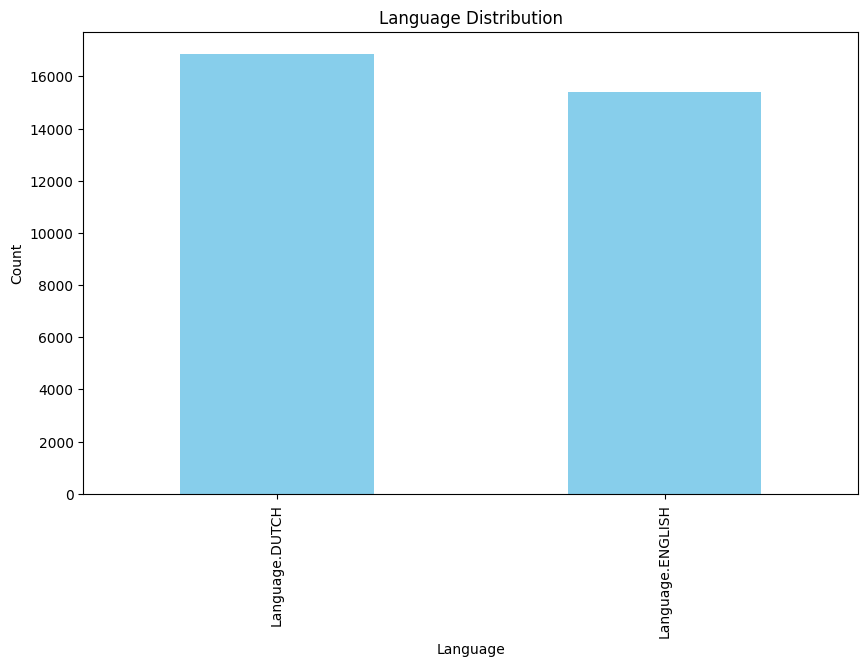

In [203]:
# Calculate the proportions of each language
tt21 = tt21.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt21['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

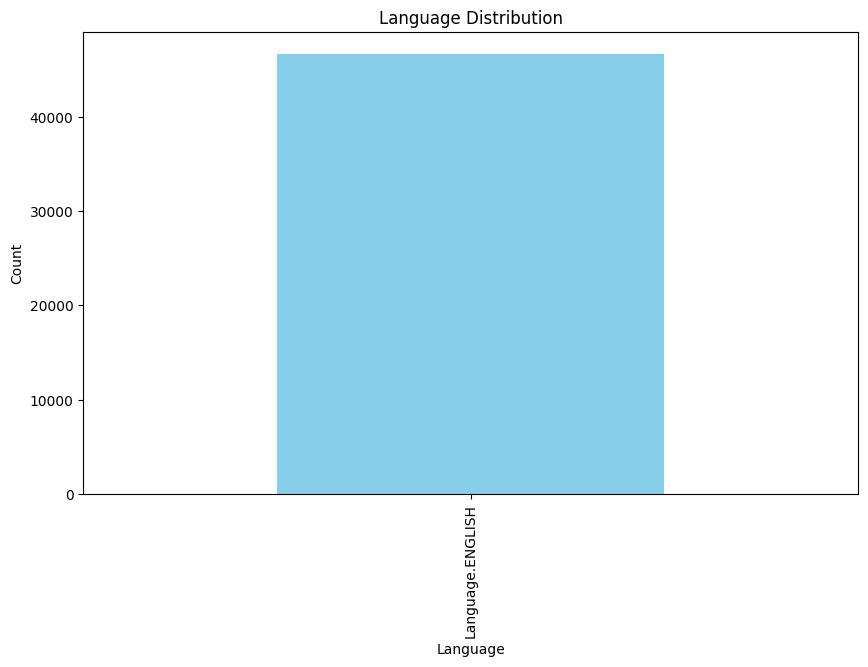

In [204]:
# Calculate the proportions of each language
dfyt = dfyt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfyt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

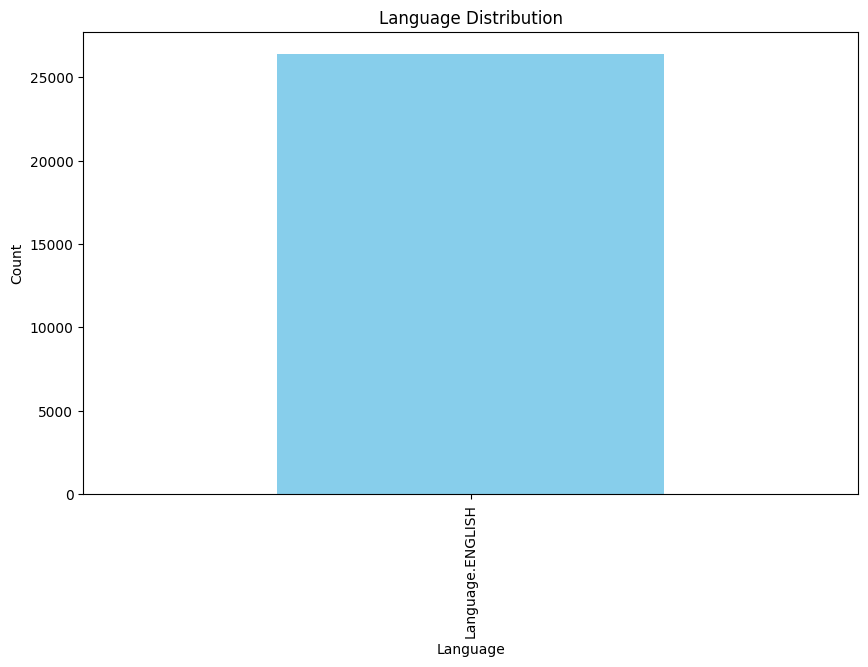

In [205]:
# Calculate the proportions of each language
ytall = ytall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ytall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

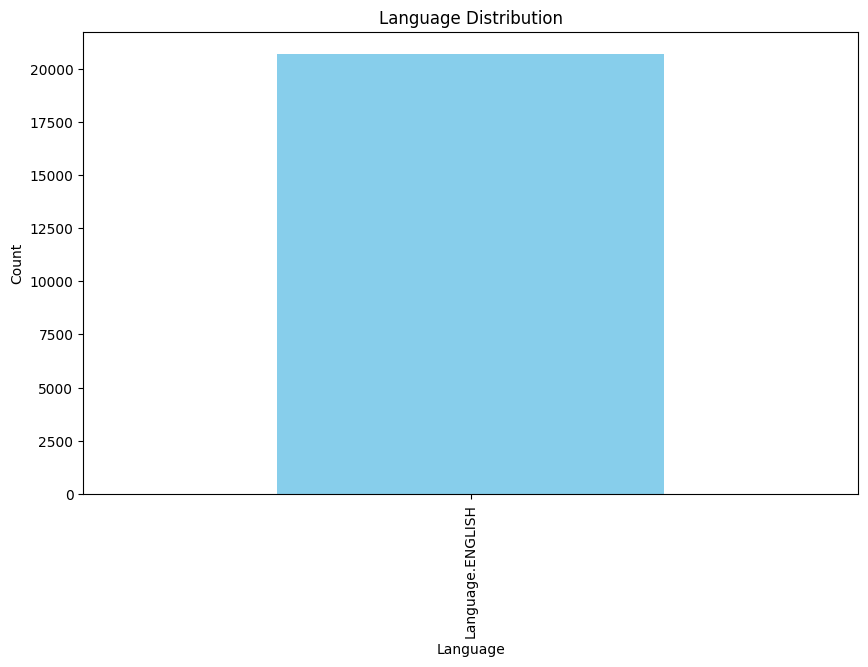

In [206]:
# Calculate the proportions of each language
yt31 = yt31.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt31['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

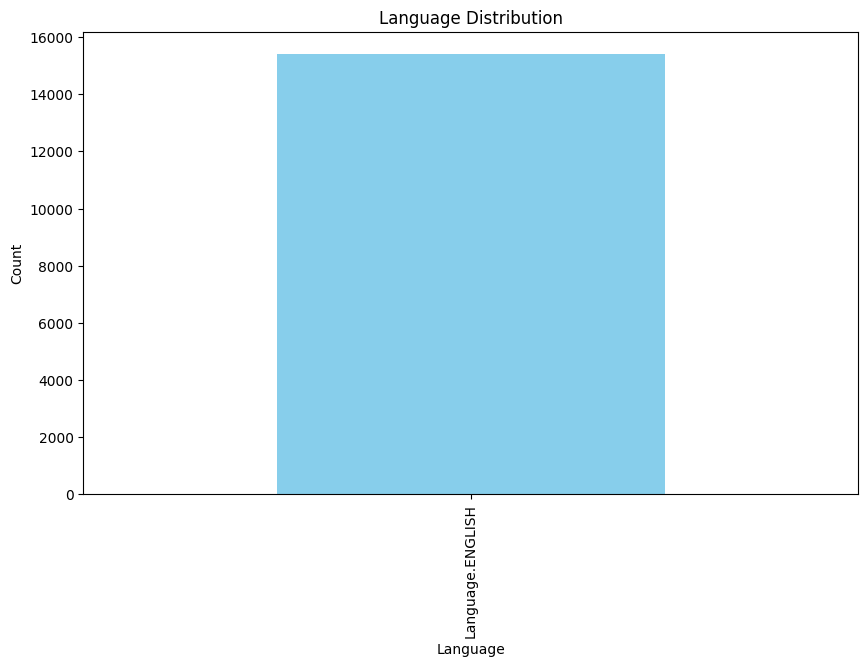

In [207]:
# Calculate the proportions of each language
yt32 = yt32.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt32['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()